In [283]:
import pandas as pd 
import numpy as np

In [284]:
df_orig = pd.read_csv("traffic_accidents.csv")

df_orig.head()

,Date,Accident Spot,Area,County,Road/ Highway,Brief Accident Details/Cause,Victims,Total people confirmed dead,Time of the Accidents,Weather conditions
0,2023-08-08,Sobea,Sobea,Nakuru,Nakuru-Eldoret Highway,Head on Collision,Passengers,4,4.30 pm,NaN
1,2023-08-07,Maai-Mahiu,Naivasha,Nakuru,Maai-Mahiu Naivasha Highway,vehicle and motorcycle collision,Passengers,1,5.50 pm,NaN
2,2023-07-25,Ntulele,Ntulele,Narok,Narok Mai Mahiu road,Head on Collision,Drivers/Occupants,4,NaN,NaN
3,2022-12-02,Suswa,Suswa,Narok,Narok Mai Mahiu road,Head on Collision,Driver and passengers,3,6.00 pm,NaN
4,2022-12-01,Mutira,Mutira,Kirinyaga,Kerugoya-Karatina Road,Run over,Pedestrian,1,NaN,NaN


In [285]:
# View Missing Values
df_orig.isna().sum()

Date                             1
Accident Spot                    0
Area                             0
County                           0
Road/ Highway                    1
Brief Accident Details/Cause     2
Victims                         18
Total people confirmed dead      9
Time of the Accidents           56
Weather conditions              80
dtype: int64

In [286]:
df_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Date                          80 non-null     object
 1   Accident Spot                 81 non-null     object
 2   Area                          81 non-null     object
 3   County                        81 non-null     object
 4   Road/ Highway                 80 non-null     object
 5   Brief Accident Details/Cause  79 non-null     object
 6   Victims                       63 non-null     object
 7   Total people confirmed dead   72 non-null     object
 8   Time of the Accidents         25 non-null     object
 9   Weather conditions            1 non-null      object
dtypes: object(10)
memory usage: 6.5+ KB


### Handle Missing Values

In [287]:
# Make a copy of the db
df = df_orig.copy()

df.head()

,Date,Accident Spot,Area,County,Road/ Highway,Brief Accident Details/Cause,Victims,Total people confirmed dead,Time of the Accidents,Weather conditions
0,2023-08-08,Sobea,Sobea,Nakuru,Nakuru-Eldoret Highway,Head on Collision,Passengers,4,4.30 pm,NaN
1,2023-08-07,Maai-Mahiu,Naivasha,Nakuru,Maai-Mahiu Naivasha Highway,vehicle and motorcycle collision,Passengers,1,5.50 pm,NaN
2,2023-07-25,Ntulele,Ntulele,Narok,Narok Mai Mahiu road,Head on Collision,Drivers/Occupants,4,NaN,NaN
3,2022-12-02,Suswa,Suswa,Narok,Narok Mai Mahiu road,Head on Collision,Driver and passengers,3,6.00 pm,NaN
4,2022-12-01,Mutira,Mutira,Kirinyaga,Kerugoya-Karatina Road,Run over,Pedestrian,1,NaN,NaN


In [288]:
# Rename Columns
df = df.rename(
  columns={
    'Accident Spot': 'accident-spot',
    'Road/ Highway': 'road',
    'Brief Accident Details/Cause': 'accident-details',
    'Total people confirmed dead': 'total-people-confirmed-dead',
    'Time of the Accidents': 'accident-time',
    'Weather conditions': 'weather'
  }
)

In [289]:
df.columns

Index(['Date', 'accident-spot', 'Area', 'County', 'road', 'accident-details',
       'Victims', 'total-people-confirmed-dead', 'accident-time', 'weather'],
      dtype='object')

In [290]:

# Drop Columns (Weather Condition, Time of accident)
df = df.drop(columns=['weather', 'accident-time'], axis=1)

df.columns

Index(['Date', 'accident-spot', 'Area', 'County', 'road', 'accident-details',
       'Victims', 'total-people-confirmed-dead'],
      dtype='object')

In [291]:
df.head()

,Date,accident-spot,Area,County,road,accident-details,Victims,total-people-confirmed-dead
0,2023-08-08,Sobea,Sobea,Nakuru,Nakuru-Eldoret Highway,Head on Collision,Passengers,4
1,2023-08-07,Maai-Mahiu,Naivasha,Nakuru,Maai-Mahiu Naivasha Highway,vehicle and motorcycle collision,Passengers,1
2,2023-07-25,Ntulele,Ntulele,Narok,Narok Mai Mahiu road,Head on Collision,Drivers/Occupants,4
3,2022-12-02,Suswa,Suswa,Narok,Narok Mai Mahiu road,Head on Collision,Driver and passengers,3
4,2022-12-01,Mutira,Mutira,Kirinyaga,Kerugoya-Karatina Road,Run over,Pedestrian,1


In [292]:
# View Missing Values
df.isna().sum()

Date                            1
accident-spot                   0
Area                            0
County                          0
road                            1
accident-details                2
Victims                        18
total-people-confirmed-dead     9
dtype: int64

In [293]:
# Fill the victims column with the average value
frequent = df['Victims'].mode()[0]

df['Victims'] = df['Victims'].fillna(frequent)

In [294]:
# Replace non-numeric values with NaN's
df['total-people-confirmed-dead'] = pd.to_numeric(df['total-people-confirmed-dead'], errors='coerce')

In [295]:
# Fill the missing values in confirmed dead using the median values
df["total-people-confirmed-dead"].fillna(df['total-people-confirmed-dead'].median(), inplace=True)

/tmp/ipykernel_32384/2635404961.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["total-people-confirmed-dead"].fillna(df['total-people-confirmed-dead'].median(), inplace=True)


In [296]:
# Convert date column to datetime type
df["Date"] = pd.to_datetime(df['Date'], format='%Y-%m-%d')


# Extract Date Data to Different Columns
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day

# Drop the date column
df = df.drop("Date", axis=1)

In [297]:
df.isna().sum()

accident-spot                  0
Area                           0
County                         0
road                           1
accident-details               2
Victims                        0
total-people-confirmed-dead    0
year                           1
month                          1
day                            1
dtype: int64

In [298]:
df = df.dropna(subset=['month'])

df.isna().sum()

accident-spot                  0
Area                           0
County                         0
road                           1
accident-details               2
Victims                        0
total-people-confirmed-dead    0
year                           0
month                          0
day                            0
dtype: int64

In [299]:
df = df.dropna()

df.isna().sum()

accident-spot                  0
Area                           0
County                         0
road                           0
accident-details               0
Victims                        0
total-people-confirmed-dead    0
year                           0
month                          0
day                            0
dtype: int64

In [300]:
file = '1-traffic.csv'

df.to_csv(file, index=False)

In [301]:
df.head()

,accident-spot,Area,County,road,accident-details,Victims,total-people-confirmed-dead,year,month,day
0,Sobea,Sobea,Nakuru,Nakuru-Eldoret Highway,Head on Collision,Passengers,4.0,2023.0,8.0,8.0
1,Maai-Mahiu,Naivasha,Nakuru,Maai-Mahiu Naivasha Highway,vehicle and motorcycle collision,Passengers,1.0,2023.0,8.0,7.0
2,Ntulele,Ntulele,Narok,Narok Mai Mahiu road,Head on Collision,Drivers/Occupants,4.0,2023.0,7.0,25.0
3,Suswa,Suswa,Narok,Narok Mai Mahiu road,Head on Collision,Driver and passengers,3.0,2022.0,12.0,2.0
4,Mutira,Mutira,Kirinyaga,Kerugoya-Karatina Road,Run over,Pedestrian,1.0,2022.0,12.0,1.0


### Categorize Data

Utilize sklearn's one hot encoder to encode columns like (Area, County, and Road) into numerical classes

In [302]:
df = pd.read_csv('1-traffic.csv')

df.isna().sum()

accident-spot                  0
Area                           0
County                         0
road                           0
accident-details               0
Victims                        0
total-people-confirmed-dead    0
year                           0
month                          0
day                            0
dtype: int64

In [303]:
df.head()

,accident-spot,Area,County,road,accident-details,Victims,total-people-confirmed-dead,year,month,day
0,Sobea,Sobea,Nakuru,Nakuru-Eldoret Highway,Head on Collision,Passengers,4.0,2023.0,8.0,8.0
1,Maai-Mahiu,Naivasha,Nakuru,Maai-Mahiu Naivasha Highway,vehicle and motorcycle collision,Passengers,1.0,2023.0,8.0,7.0
2,Ntulele,Ntulele,Narok,Narok Mai Mahiu road,Head on Collision,Drivers/Occupants,4.0,2023.0,7.0,25.0
3,Suswa,Suswa,Narok,Narok Mai Mahiu road,Head on Collision,Driver and passengers,3.0,2022.0,12.0,2.0
4,Mutira,Mutira,Kirinyaga,Kerugoya-Karatina Road,Run over,Pedestrian,1.0,2022.0,12.0,1.0


In [304]:
df['County'] = df['County'].astype(str)


# Encode the columns
dummies = pd.get_dummies(df['County'], prefix='County')

dummies = dummies.astype(int)

df = pd.concat([df, dummies], axis=1)

df.head()

,accident-spot,Area,County,road,accident-details,Victims,total-people-confirmed-dead,year,month,day,...,County_Nairobi,County_Nairobi,County_Naivasha,County_Nakuru,County_Narok,County_Taita Taveta,County_Tharaka Nithi,County_Turkana,County_Uansin Gishi,County_Vihiga
0,Sobea,Sobea,Nakuru,Nakuru-Eldoret Highway,Head on Collision,Passengers,4.0,2023.0,8.0,8.0,...,0,0,0,1,0,0,0,0,0,0
1,Maai-Mahiu,Naivasha,Nakuru,Maai-Mahiu Naivasha Highway,vehicle and motorcycle collision,Passengers,1.0,2023.0,8.0,7.0,...,0,0,0,1,0,0,0,0,0,0
2,Ntulele,Ntulele,Narok,Narok Mai Mahiu road,Head on Collision,Drivers/Occupants,4.0,2023.0,7.0,25.0,...,0,0,0,0,1,0,0,0,0,0
3,Suswa,Suswa,Narok,Narok Mai Mahiu road,Head on Collision,Driver and passengers,3.0,2022.0,12.0,2.0,...,0,0,0,0,1,0,0,0,0,0
4,Mutira,Mutira,Kirinyaga,Kerugoya-Karatina Road,Run over,Pedestrian,1.0,2022.0,12.0,1.0,...,0,0,0,0,0,0,0,0,0,0


In [305]:
# Drop the county, area and accident spot columns
df = df.drop(columns=['County', 'Area', 'accident-spot', 'road'], axis=1)

df.head()

,accident-details,Victims,total-people-confirmed-dead,year,month,day,County_Bomet,County_Homabay,County_Isiolo,County_Kajiado,...,County_Nairobi,County_Nairobi,County_Naivasha,County_Nakuru,County_Narok,County_Taita Taveta,County_Tharaka Nithi,County_Turkana,County_Uansin Gishi,County_Vihiga
0,Head on Collision,Passengers,4.0,2023.0,8.0,8.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,vehicle and motorcycle collision,Passengers,1.0,2023.0,8.0,7.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,Head on Collision,Drivers/Occupants,4.0,2023.0,7.0,25.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,Head on Collision,Driver and passengers,3.0,2022.0,12.0,2.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,Run over,Pedestrian,1.0,2022.0,12.0,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [306]:
file = '2-traffic.csv'

df.to_csv(file, index=False)

In [307]:
# Convert the accident detail column to a more cleaner version
df['accident-details'] = df['accident-details'].apply(
    lambda x: 'matatu' if 'matatu' in x.lower() else x)
df['accident-details'] = df['accident-details'].apply(
    lambda x: 'truck' if 'truck' in x.lower() else x)
df['accident-details'] = df['accident-details'].apply(
    lambda x: 'bus' if 'bus' in x.lower() else x)
df['accident-details'] = df['accident-details'].apply(
    lambda x: 'car' if any(word in x.lower() for word in ['vehicle', 'car']) else x)


df.head()

,accident-details,Victims,total-people-confirmed-dead,year,month,day,County_Bomet,County_Homabay,County_Isiolo,County_Kajiado,...,County_Nairobi,County_Nairobi,County_Naivasha,County_Nakuru,County_Narok,County_Taita Taveta,County_Tharaka Nithi,County_Turkana,County_Uansin Gishi,County_Vihiga
0,Head on Collision,Passengers,4.0,2023.0,8.0,8.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,car,Passengers,1.0,2023.0,8.0,7.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,Head on Collision,Drivers/Occupants,4.0,2023.0,7.0,25.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,Head on Collision,Driver and passengers,3.0,2022.0,12.0,2.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,Run over,Pedestrian,1.0,2022.0,12.0,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [308]:
df['accident-details'] = df['accident-details'].astype(str)


# Encode the columns
dummies = pd.get_dummies(df['accident-details'], prefix='Cause')

dummies = dummies.astype(int)

df = pd.concat([df, dummies], axis=1)

df.head()

,accident-details,Victims,total-people-confirmed-dead,year,month,day,County_Bomet,County_Homabay,County_Isiolo,County_Kajiado,...,Cause_Head on Collision,Cause_Head on collision,Cause_Head on collision,Cause_Motorist crashed into toll station,Cause_Run over,Cause_bus,Cause_car,Cause_matatu,Cause_shuttle rammed into a lorry,Cause_truck
0,Head on Collision,Passengers,4.0,2023.0,8.0,8.0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,car,Passengers,1.0,2023.0,8.0,7.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,Head on Collision,Drivers/Occupants,4.0,2023.0,7.0,25.0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,Head on Collision,Driver and passengers,3.0,2022.0,12.0,2.0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,Run over,Pedestrian,1.0,2022.0,12.0,1.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [309]:
df = df.drop('accident-details', axis=1)

df.head()

,Victims,total-people-confirmed-dead,year,month,day,County_Bomet,County_Homabay,County_Isiolo,County_Kajiado,County_Kakamega,...,Cause_Head on Collision,Cause_Head on collision,Cause_Head on collision,Cause_Motorist crashed into toll station,Cause_Run over,Cause_bus,Cause_car,Cause_matatu,Cause_shuttle rammed into a lorry,Cause_truck
0,Passengers,4.0,2023.0,8.0,8.0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,Passengers,1.0,2023.0,8.0,7.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,Drivers/Occupants,4.0,2023.0,7.0,25.0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,Driver and passengers,3.0,2022.0,12.0,2.0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,Pedestrian,1.0,2022.0,12.0,1.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [311]:
df['Victims'] = df['Victims'].astype(str)


# Encode the columns
dummies = pd.get_dummies(df['Victims'], prefix='Victims')

dummies = dummies.astype(int)

df = pd.concat([df, dummies], axis=1)

df = df.drop('Victims', axis=1)

df.head()

,total-people-confirmed-dead,year,month,day,County_Bomet,County_Homabay,County_Isiolo,County_Kajiado,County_Kakamega,County_Kiambu,...,Victims_Passenger,Victims_Passengers,Victims_Passengers and driver,Victims_Passengers and drivers,Victims_Passengers and pedestrians,Victims_Pedestrian,Victims_Pedestrians,Victims_Rider,Victims_passenger,Victims_passengers
0,4.0,2023.0,8.0,8.0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,1.0,2023.0,8.0,7.0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,4.0,2023.0,7.0,25.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3.0,2022.0,12.0,2.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.0,2022.0,12.0,1.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


### Create the target variable


In [ ]:
# Visualize the number of dead people distribution
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<Axes: xlabel='total-people-confirmed-dead', ylabel='Count'>

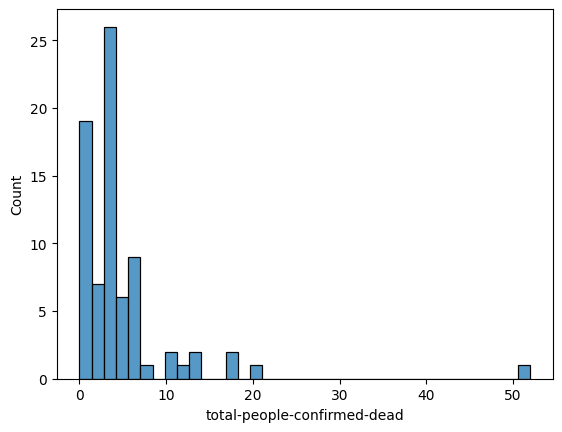

In [315]:
sns.histplot(data=df, x='total-people-confirmed-dead')

In [ ]:
def categorize_dead_victims(x):
    if x == 0:
        return 0
    elif 1 <= x <= 5:
        return 1
    elif 6 <= x <= 10:
        return 2
    else:
        return 3
    

# Apply the function to create new column
df['target'] = df['total-people-confirmed-dead'].apply(categorize_dead_victims)

,total-people-confirmed-dead,year,month,day,County_Bomet,County_Homabay,County_Isiolo,County_Kajiado,County_Kakamega,County_Kiambu,...,Victims_Passengers,Victims_Passengers and driver,Victims_Passengers and drivers,Victims_Passengers and pedestrians,Victims_Pedestrian,Victims_Pedestrians,Victims_Rider,Victims_passenger,Victims_passengers,target
0,4.0,2023.0,8.0,8.0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,1.0,2023.0,8.0,7.0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,4.0,2023.0,7.0,25.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,3.0,2022.0,12.0,2.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1.0,2022.0,12.0,1.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [318]:
df = df.drop('total-people-confirmed-dead', axis=1)

df.head()

,year,month,day,County_Bomet,County_Homabay,County_Isiolo,County_Kajiado,County_Kakamega,County_Kiambu,County_Kilifi,...,Victims_Passengers,Victims_Passengers and driver,Victims_Passengers and drivers,Victims_Passengers and pedestrians,Victims_Pedestrian,Victims_Pedestrians,Victims_Rider,Victims_passenger,Victims_passengers,target
0,2023.0,8.0,8.0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,2023.0,8.0,7.0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,2023.0,7.0,25.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2022.0,12.0,2.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,2022.0,12.0,1.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


### Start on the prediction

In [327]:
# Split the data
from sklearn.model_selection import train_test_split


np.random.seed(42)

# Create the data
X = df.drop('target', axis=1)
y = df['target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

X_train.head()

,year,month,day,County_Bomet,County_Homabay,County_Isiolo,County_Kajiado,County_Kakamega,County_Kiambu,County_Kilifi,...,Victims_Passenger,Victims_Passengers,Victims_Passengers and driver,Victims_Passengers and drivers,Victims_Passengers and pedestrians,Victims_Pedestrian,Victims_Pedestrians,Victims_Rider,Victims_passenger,Victims_passengers
65,2023.0,1.0,29.0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
54,2021.0,12.0,12.0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
31,2022.0,7.0,5.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,2022.0,7.0,28.0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
62,2023.0,4.0,18.0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


### KNN Model

In [334]:
from sklearn.preprocessing import StandardScaler

# Instantiate the standard scaler
sc = StandardScaler()

# FIt and transform the features
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [335]:
from sklearn.neighbors import KNeighborsClassifier as KNN 


# Initialize the model
knn = KNN(n_neighbors=7)

# Fit it into the data
knn.fit(X_train_sc, y_train)

# Check score
knn.score(X_test_sc, y_test)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7ad684a90b80>
Traceback (most recent call last):
  File "/home/ronny/anaconda3/lib/python3.12/site-packages/threadpoolctl.py", line 400, in match_module_callback
    if backend not in self.loaded_backends:
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/ronny/anaconda3/lib/python3.12/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    
  File "/home/ronny/anaconda3/lib/python3.12/site-packages/threadpoolctl.py", line 606, in __init__
    ):
       
  File "/home/ronny/anaconda3/lib/python3.12/site-packages/threadpoolctl.py", line 646, in get_version
    return num_threads
             ^^^^^^^^^^
AttributeError: 'NoneType' object has no attribute 'split'


0.6666666666666666

In [336]:
# Prediction
y_pred = knn.predict(X_test)

y_pred[:5]

/home/ronny/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  "removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.",
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7ad684a80e00>
Traceback (most recent call last):
  File "/home/ronny/anaconda3/lib/python3.12/site-packages/threadpoolctl.py", line 400, in match_module_callback
    if backend not in self.loaded_backends:
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/ronny/anaconda3/lib/python3.12/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    
  File "/home/ronny/anaconda3/lib/python3.12/site-packages/threadpoolctl.py", line 606, in __init__
    ):
       
  File "/home/ronny/anaconda3/lib/python3.12/site-packages/threadpoolctl.py", line 646, in get_version
    return num_th

array([1, 0, 0, 1, 1])

### Evaluate the KNN Model

In [339]:
from sklearn.metrics import confusion_matrix, classification_report

confusion_matrix(y_test, y_pred)

array([[ 1,  1,  0,  0],
       [10,  6,  0,  0],
       [ 4,  0,  0,  0],
       [ 2,  0,  0,  0]])

Text(20.72222222222222, 0.5, 'Actual')

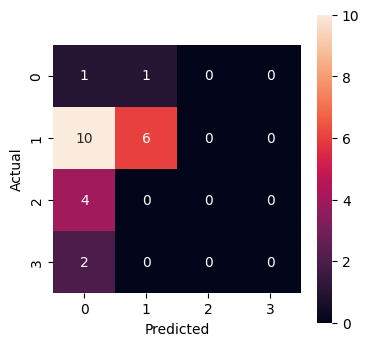

In [341]:
# Visualize the confusion matrix
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot=True, square=True)

ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

In [340]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.06      0.50      0.11         2
           1       0.86      0.38      0.52        16
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         2

    accuracy                           0.29        24
   macro avg       0.23      0.22      0.16        24
weighted avg       0.58      0.29      0.36        24



/home/ronny/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  >>> fbeta_score(y_true, y_pred, average=None, beta=0.5)
/home/ronny/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  >>> fbeta_score(y_true, y_pred, average=None, beta=0.5)
/home/ronny/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  >>> fbeta_score(y_true, y_pred, average=None, beta=0.5)


### Plot ROC Curve

/home/ronny/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  "removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.",
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7ad684a27a60>
Traceback (most recent call last):
  File "/home/ronny/anaconda3/lib/python3.12/site-packages/threadpoolctl.py", line 400, in match_module_callback
    if backend not in self.loaded_backends:
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/ronny/anaconda3/lib/python3.12/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    
  File "/home/ronny/anaconda3/lib/python3.12/site-packages/threadpoolctl.py", line 606, in __init__
    ):
       
  File "/home/ronny/anaconda3/lib/python3.12/site-packages/threadpoolctl.py", line 646, in get_version
    return num_th

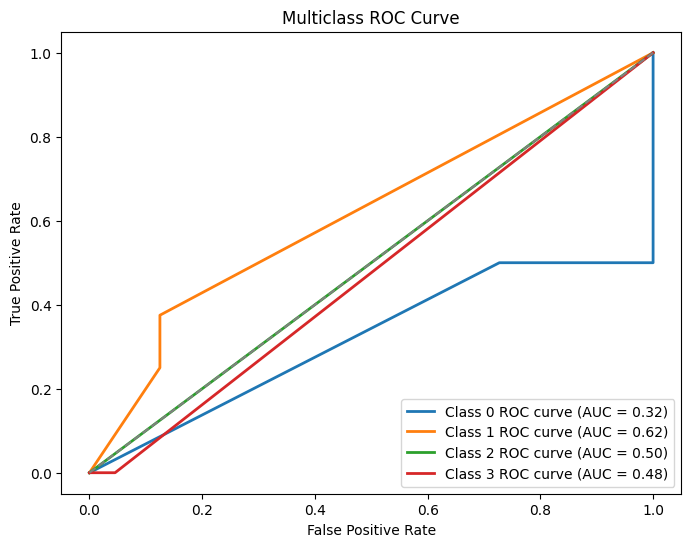

In [345]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the true labels for multiclass
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3])  # Adjust based on your class labels

y_pred_proba = knn.predict_proba(X_test)

# Compute ROC curve and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}

for i in range(4):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(8, 6))

# Plot each class's ROC curve
for i in range(4):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} ROC curve (AUC = {roc_auc[i]:.2f})')

# Plot the diagonal line (random classifier)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Add labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve')
plt.legend(loc='lower right')
plt.show()